# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

         #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | zhaqsy
Processing Record 5 of Set 1 | luanco
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | hobyo
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | manggar
Processing Record 11 of Set 1 | mejit
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | turpan
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | karratha
Processing Record 21 of Set 1 | nole
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1 | edi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,9.20,86,100,1.54,US,1713584085
1,hawaiian paradise park,19.5933,-154.9731,24.37,82,100,4.12,US,1713584085
2,whitehorse,60.7161,-135.0538,14.43,15,20,4.12,CA,1713584086
3,zhaqsy,51.9083,67.3133,19.18,58,8,1.82,KZ,1713584086
4,luanco,43.6152,-5.7934,13.10,87,24,5.81,ES,1713584087


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,9.20,86,100,1.54,US,1713584085
1,hawaiian paradise park,19.5933,-154.9731,24.37,82,100,4.12,US,1713584085
2,whitehorse,60.7161,-135.0538,14.43,15,20,4.12,CA,1713584086
3,zhaqsy,51.9083,67.3133,19.18,58,8,1.82,KZ,1713584086
4,luanco,43.6152,-5.7934,13.10,87,24,5.81,ES,1713584087


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

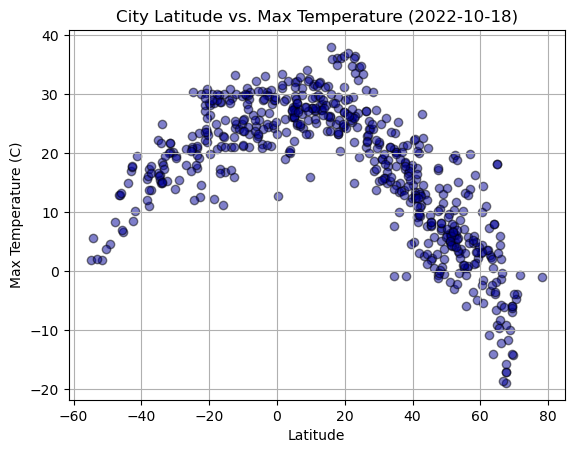

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

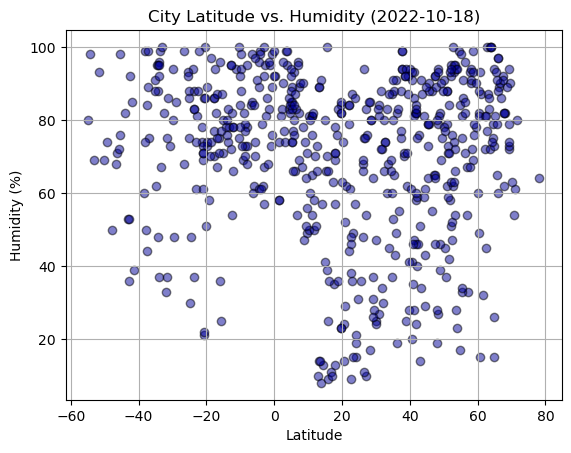

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

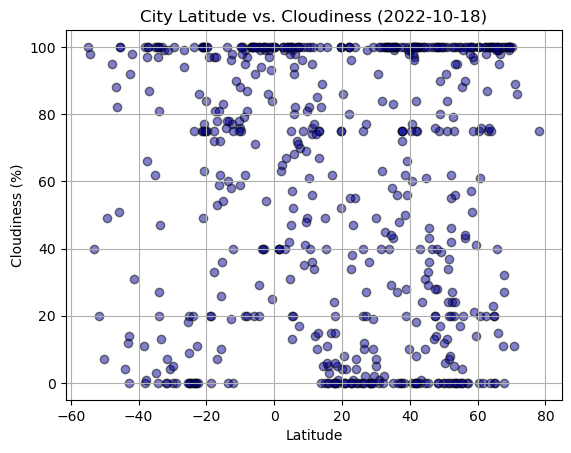

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

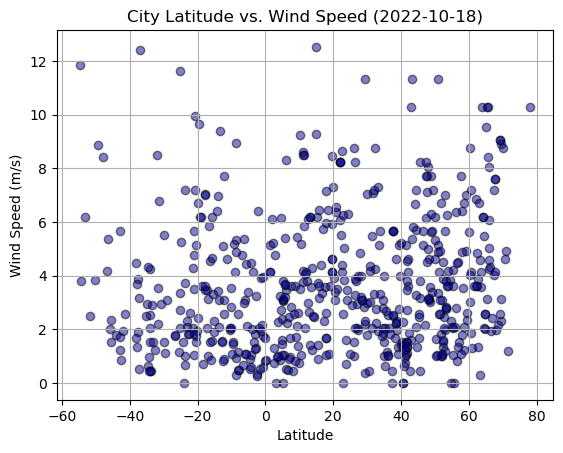

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):

    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#getting regression values
    regress_values = slope*x_values + intercept

#create the line equation
    line_eq = "y="+ str(round(slope,2)) + "x+" + str(round(intercept,2))

    #plotting the regresion line
    plt.plot(x_values, regress_values, "r-")

#annotate the graph
    plt.annotate(line_eq, (max(x_values), min(y_values)), fontsize=12, color='red', verticalalignment='top', horizontalalignment='left')

    print(f"the r value is: {rvalue}")



In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,9.20,86,100,1.54,US,1713584085
1,hawaiian paradise park,19.5933,-154.9731,24.37,82,100,4.12,US,1713584085
2,whitehorse,60.7161,-135.0538,14.43,15,20,4.12,CA,1713584086
3,zhaqsy,51.9083,67.3133,19.18,58,8,1.82,KZ,1713584086
4,luanco,43.6152,-5.7934,13.10,87,24,5.81,ES,1713584087


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port mathurin,-19.6833,63.4167,26.38,73,100,9.64,MU,1713584087
7,waitangi,-43.9535,-176.5597,14.90,82,4,1.79,NZ,1713584088
8,avarua,-21.2078,-159.7750,27.03,74,75,2.06,CK,1713583951
9,manggar,-2.8833,108.2667,30.37,67,40,3.24,ID,1713584089
11,adamstown,-25.0660,-130.1015,22.89,75,9,11.64,PN,1713584090


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

the r value is: -0.8674877406842617


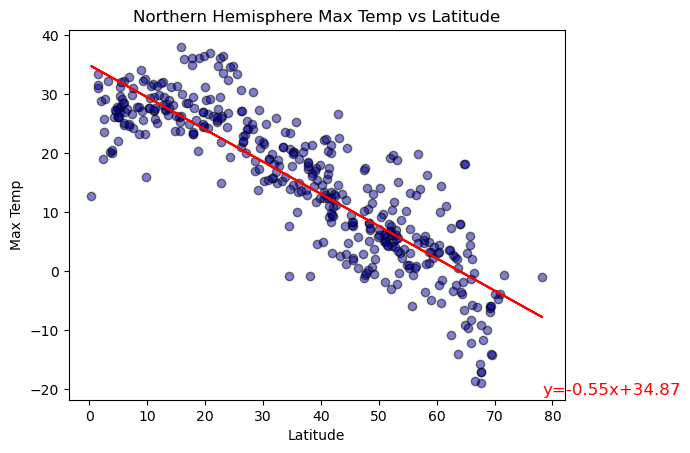

In [83]:
#Building the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere Max Temp vs Latitude')



#defining values for regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linear_regression(x_values, y_values)

plt.show()



the r value is 0.7642612398112729


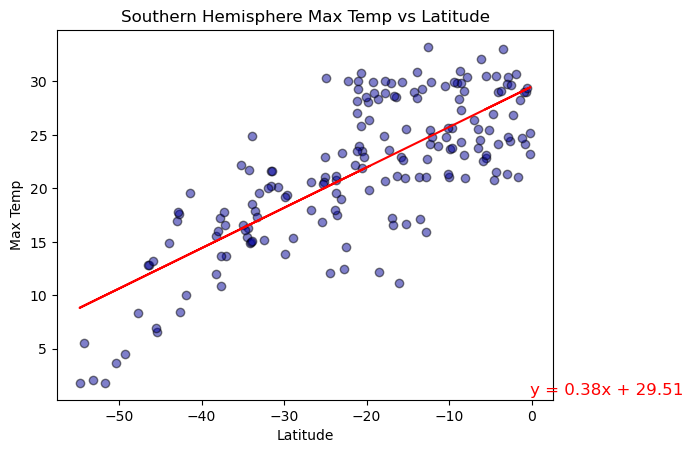

In [65]:
#Building the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere Max Temp vs Latitude')



#defining values for regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linear_regression(x_values, y_values)

plt.show()

**Discussion about the linear relationship:
#Temperature for both Northern and Southern Hemishperes has quite a strong relationship as expected. With the Northern Hemishphere, one would expect temperature to decrease the higher the latitude and this is shown by the strong negative r-value of -0.867 (close to -1). Similar to the Southern Hemisphere, the further south one travels, the lower the maximum temperature. Also a strong positive correlation where r-value is eqaul to 0.764

### Humidity vs. Latitude Linear Regression Plot

the r value is: 0.13727669307473778


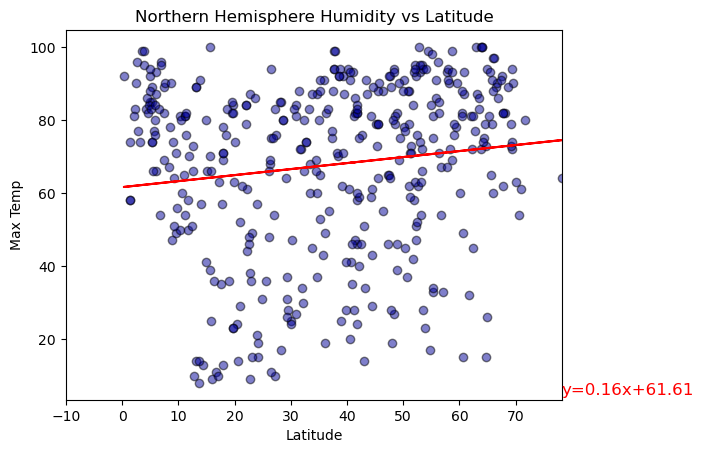

In [84]:
# Northern Hemisphere
#Building the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.xlim(-20, 80)


#defining values for regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

linear_regression(x_values, y_values)

plt.xlim(-10, max(x_values))


plt.show()

The r-value is: 0.05689741545789598


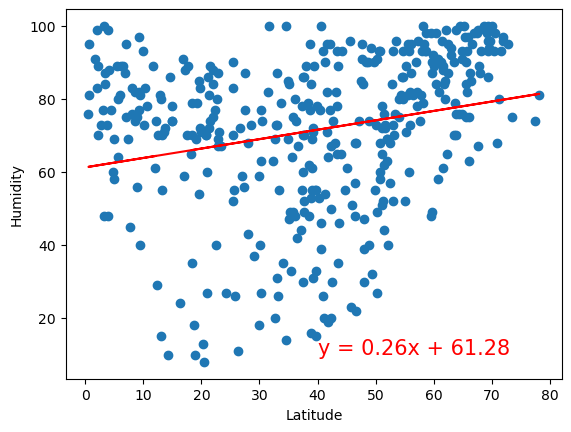

In [17]:
# Northern Hemisphere
#Building the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere Humidity vs Latitude')



#defining values for regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linear_regression(x_values, y_values)

plt.show()

the r value is 0.1597645534404859


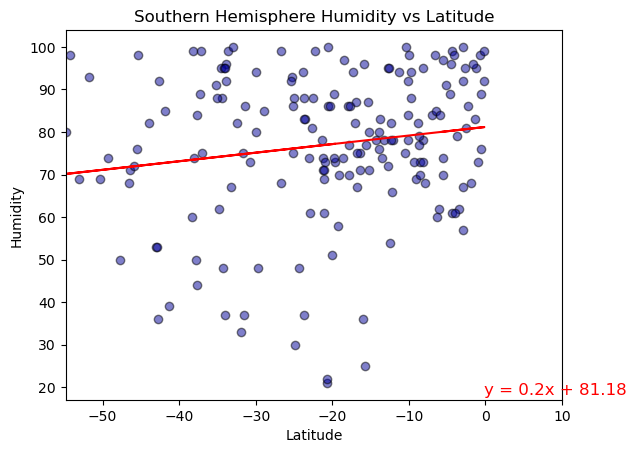

In [77]:
# Southern Hemisphere
#Building the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Humidity vs Latitude')



#defining values for regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linear_regression(x_values, y_values)

plt.xlim(min(x_values), 10)


plt.show()

The r-value is: 0.0002808747046324607


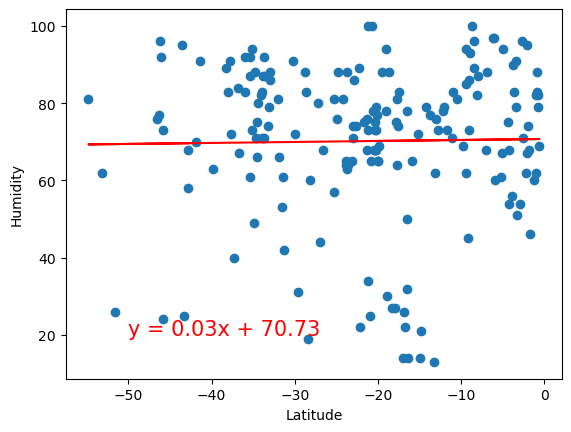

**Discussion about the linear relationship:** 
#Northern hemisphere humidity vs latitude shows no correlation due to the low r-value, however in this data set, the southern hemisphere humidity data shows a stronger relationship with an r value of 0.16. This however is still somewhat of a poor relationship as reflected by the scatter plot.

### Cloudiness vs. Latitude Linear Regression Plot

the r value is 0.06181792165138562


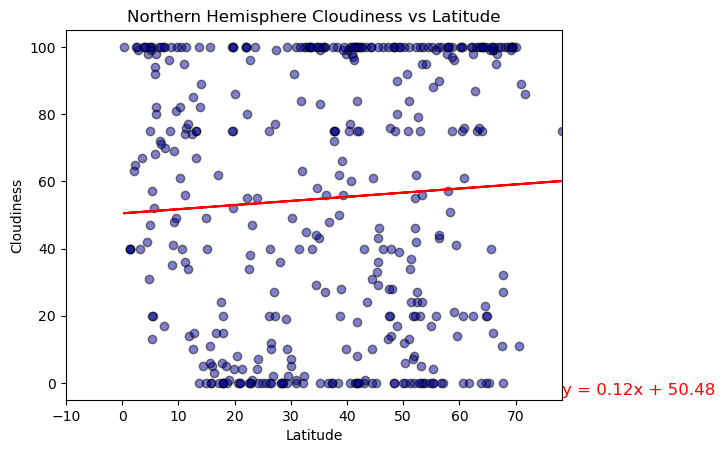

In [78]:
# Northern Hemisphere
#Building the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Cloudiness vs Latitude')



#defining values for regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linear_regression(x_values, y_values)

plt.xlim(-10, max(x_values))


plt.show()

The r-value is: 0.024026517125811015


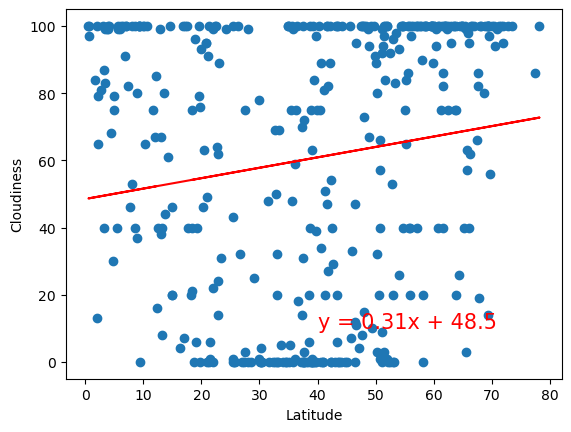

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

the r value is 0.24484922480921908


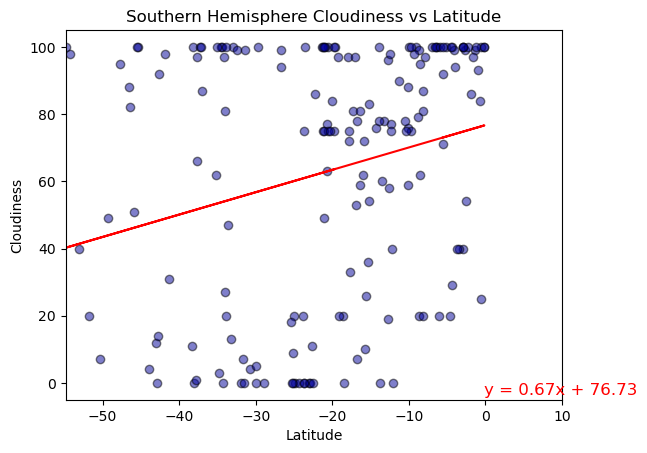

In [79]:
# Southern Hemisphere
#Building the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Cloudiness vs Latitude')



#defining values for regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linear_regression(x_values, y_values)

plt.xlim(min(x_values), 10)


plt.show()

The r-value is: 0.02056735429994368


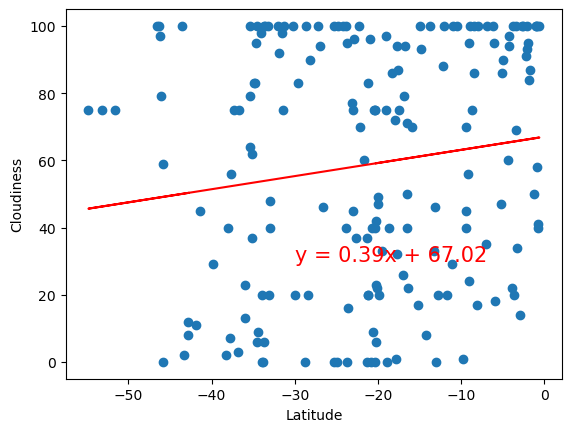

In [20]:
# Southern Hemisphere
#Building the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Cloudiness vs Latitude')



#defining values for regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linear_regression(x_values, y_values)

plt.xlim(min(x_values), 10)


plt.show()

**Discussion about the linear relationship:
#Cloudiness vs latitude in both Northern and Southern Hemispheres bares a very loose relationship given the low r-values on each graph. The scatter plots almost show no linear correlation to % cloudiness vs latitude 

### Wind Speed vs. Latitude Linear Regression Plot

the r value is 0.134308770699241


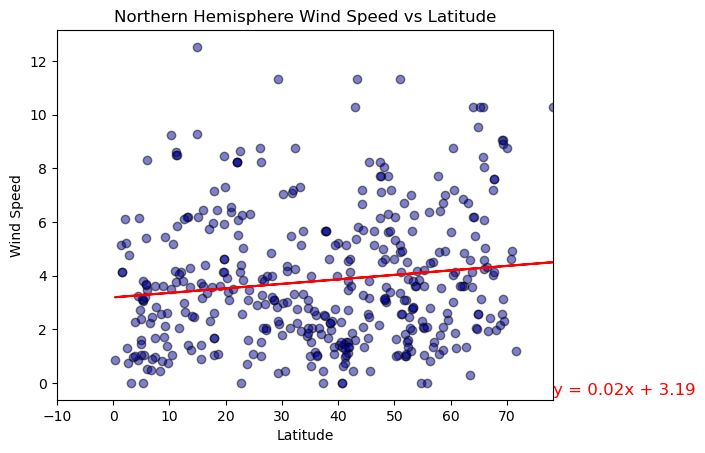

In [80]:
# Northern Hemisphere
#Building the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Wind Speed vs Latitude')



#defining values for regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linear_regression(x_values, y_values)

plt.xlim(-10, max(x_values))


plt.show()

The r-value is: 0.030396762354449467


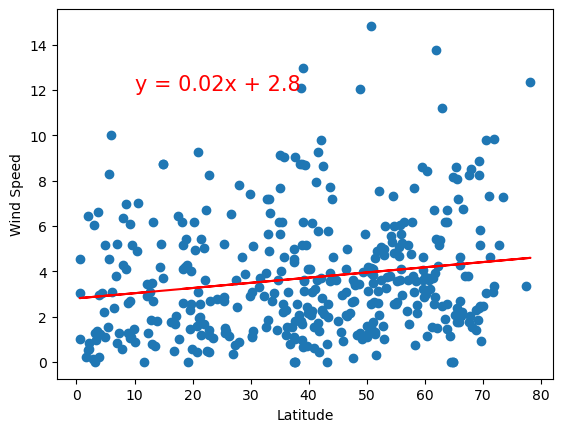

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

the r value is -0.17243494569922654


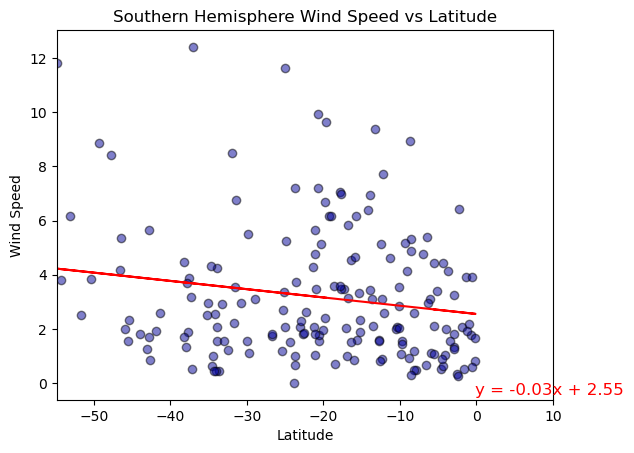

In [81]:
# Southern Hemisphere
#Building the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], alpha = 0.5, edgecolor = 'black', facecolor = (0, 0, 0.6), linewidth = 1)

#adding in details
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Wind Speed vs Latitude')



#defining values for regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linear_regression(x_values, y_values)

plt.xlim(min(x_values), 10)


plt.show()

The r-value is: 0.062239040700515696


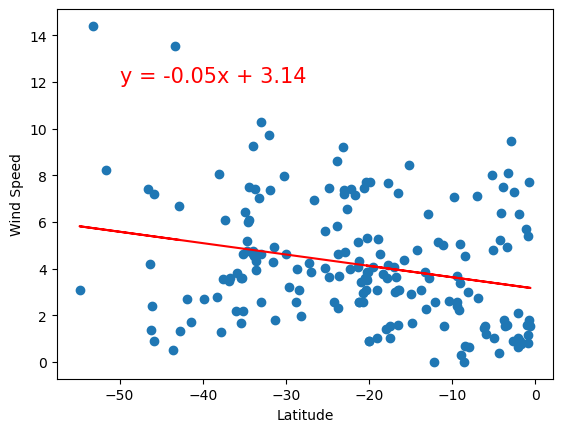

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE